In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir("/home/saumya/Documents/Spec_data/FINAL_DATA_FINAL/Model_data_noisy/LMC")

In [3]:
pred = np.load('pred_vals_lmc.npy')

In [4]:
pred

array([[735.61590391,   5.93079191,  40.28713965],
       [770.61069531,   2.63163417,  46.23333579],
       [325.99919022,   5.32554146,  18.55930834],
       ...,
       [397.08158138,   6.30193194,  46.62394705],
       [603.71381981,   5.31451589,   9.80263887],
       [611.90570376,   6.49248701,  30.62971247]])

In [5]:
true = np.load('true_vals_lmc.npy')

In [6]:
def bolts(A2, A3, x, x_o):
    A1 = 303
    a = []
    for i in range(len(A2)):
        b = A1 + (A2[i] - A1)/(1+np.exp((x-x_o[i])/A3[i]))
        a.append(b)
    return(np.array(a))

In [7]:
x = np.linspace(0, 55, 1000)

In [8]:
Pred_pro = bolts(pred[:, 0], pred[:, 1], x, pred[:, 2])

In [9]:
True_pro = bolts(true[:, 0], true[:, 1], x, pred[:, 2])

In [10]:
true[:, 0]

array([773.        , 773.        , 336.57142857, ..., 403.71428571,
       571.57142857, 638.71428571])

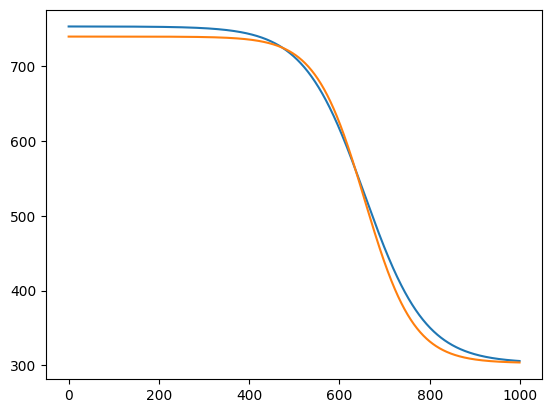

In [11]:
plt.plot(Pred_pro[100])
plt.plot(True_pro[100])

In [12]:
error_def = True_pro-Pred_pro

In [13]:
rms = []
for i in error_def:
    rms.append(np.sqrt(np.mean(i**2)))
rms = np.array(rms)

In [14]:
max(rms)

439.763627319206

In [15]:
min(rms)

8.637150286344917e-05

In [16]:
np.sqrt(np.mean(rms**2))

24.715199886816652

In [17]:
#checking models now
import pickle

In [18]:
with open('gpr_LMC_Norm.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [19]:
test_exp = np.load('/home/saumya/Documents/Flame_dianostics-temperature_profile_estimation_using_ML/FINAL_VISUAL/test_hpu.npy')

In [20]:
test_exp_0 = np.load('/home/saumya/Documents/Flame_dianostics-temperature_profile_estimation_using_ML/FINAL_VISUAL/Exp_test.npy')

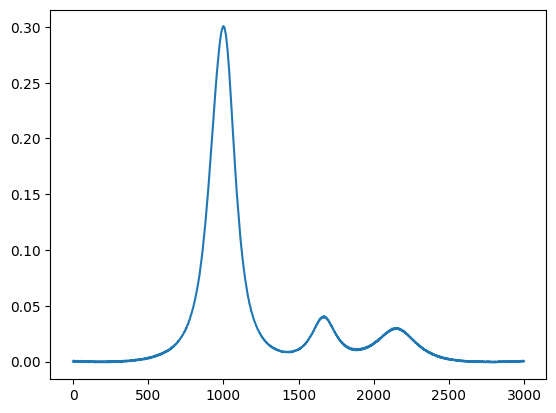

In [21]:
plt.plot(test_exp_0)

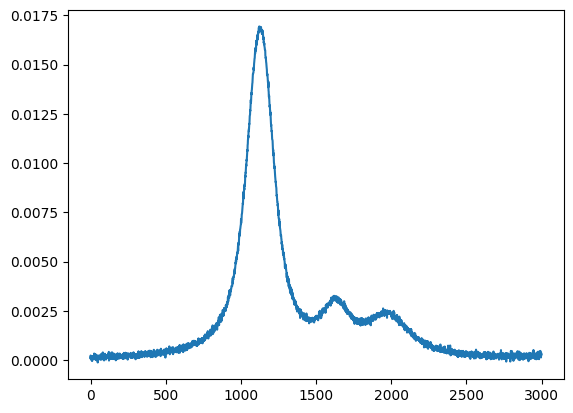

In [22]:
plt.plot(test_exp[0])

In [23]:
test_exp[0] = test_exp_0/2

In [24]:
# test_exp = test_exp/100

In [25]:
newX = test_exp

newX = np.concatenate((newX,np.zeros((np.shape(test_exp)[0],1))),1)
noise_dict = {'output_index':newX[:,-1].astype(int)}
ys_norm,var=loaded_model.predict(newX,Y_metadata=noise_dict)

In [26]:
ys_norm

array([[ 2.29467209e-21,  6.91894095e-21,  4.62225113e-21],
       [ 1.74721019e+00, -3.86661104e+00, -1.98240756e+00],
       [ 3.53743252e+00, -5.30754398e+00, -4.82085545e+00],
       ...,
       [-5.35127085e-01, -1.74618920e+00,  2.71348028e+00],
       [ 3.89418627e+00, -4.86695826e+00, -1.82567656e+00],
       [ 4.27451332e-01, -2.63705389e+00,  1.24877277e-01]])

In [27]:
with open('LMC_A1.pkl', 'rb') as file:
    y_A1_T = pickle.load(file)


with open('LMC_A2.pkl', 'rb') as file:
    y_A2_T = pickle.load(file)

with open('LMC_A3.pkl', 'rb') as file:
    y_A3_T = pickle.load(file)    
    

 /home/saumya/miniconda3/envs/tf/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning:Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [28]:
temp = y_A1_T.inverse_transform(ys_norm[:,0].reshape(-1,1)).ravel()
A2 = y_A2_T.inverse_transform(ys_norm[:,1].reshape(-1,1)).ravel()
A3 = y_A3_T.inverse_transform(ys_norm[:,2].reshape(-1,1)).ravel()

In [29]:
temp[0], A2[0], A3[0]

(538.0, 5.5, 28.0)

In [30]:
np.zeros((np.shape(test_exp)[0],1)).shape

(2500, 1)

In [31]:
np.shape(test_exp)[0]

2500

In [32]:
def bolts_int(A2, A3, x, x_o):
    A1 = 303
    b = A1 + (A2-A1)/(1+np.exp((x-x_o)/A3))
    return b

In [33]:
x = np.linspace(0, 55, 1000)


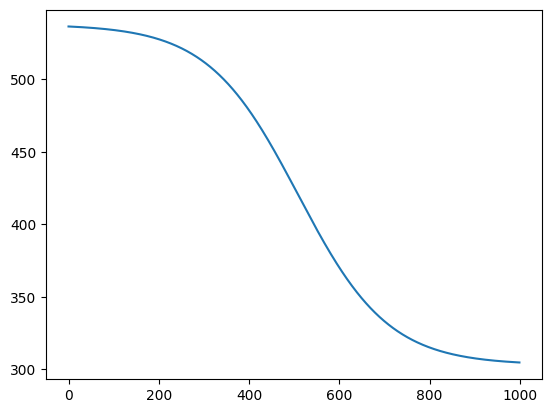

In [34]:
plt.plot(bolts_int(temp[0], A2[0], x, A3[0]))

In [35]:
perft_temp = 400+273

In [36]:
print(f'The error in % in the predicted and real value: {abs((temp[0]-perft_temp)/perft_temp)*100} %')

The error in % in the predicted and real value: 20.059435364041605 %
